In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# to show plots here
import seaborn as sns
import re
sns.set() # setting seaborn default for plots
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## PCLASS VS SURVIVAL 

In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

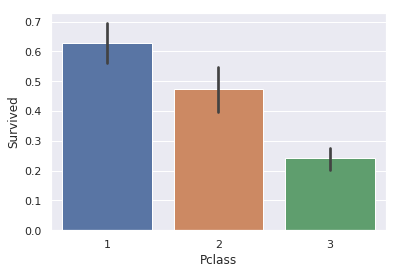

In [11]:
sns.barplot(x='Pclass', y = 'Survived', data=train)

Conclusion is high class people have high rate of survival

## Sex vs. Survival

In [12]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


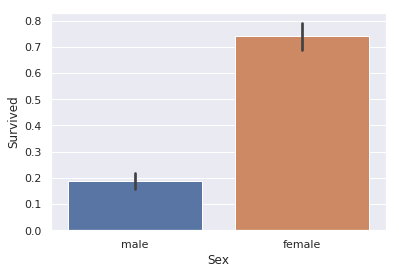

In [15]:
sns.barplot(x='Sex', y='Survived', data=train)

## Pclass & Sex vs Survival

In [16]:
train.groupby(['Sex','Pclass']).Survived.value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [17]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


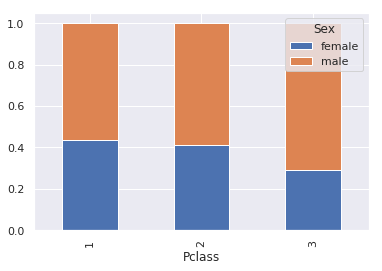

In [18]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

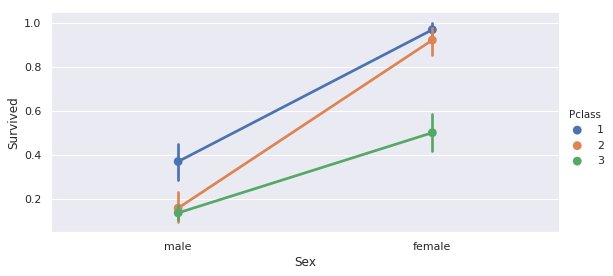

In [19]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4,aspect=2, data=train)

## sex, pclass, embarked vs survival

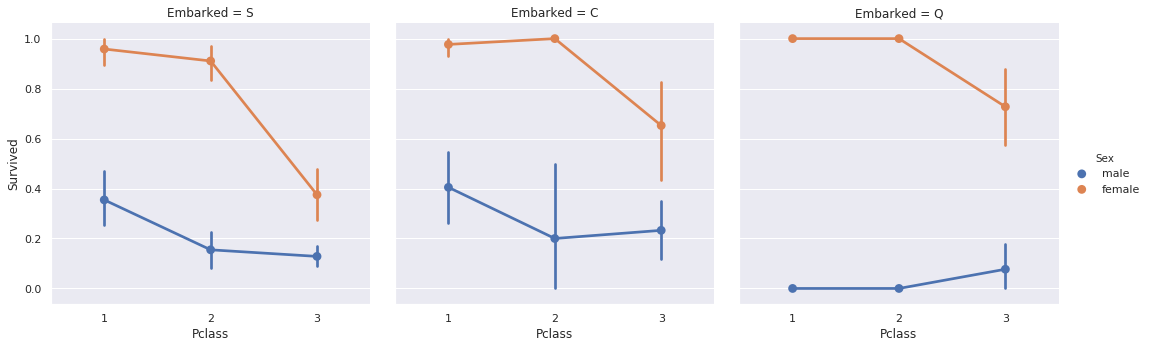

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train)

## Embarked vs Survival 

In [21]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

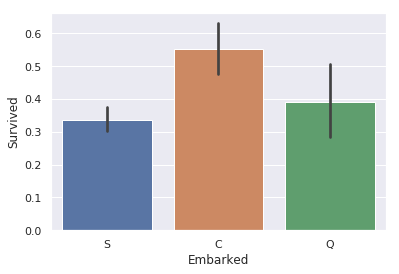

In [22]:
sns.barplot(x='Embarked', y= 'Survived', data=train)

## Parch vs Survival 

In [23]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [25]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


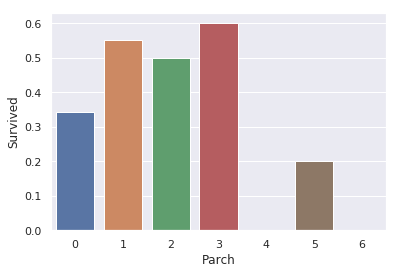

In [26]:
sns.barplot('Parch', 'Survived', ci=None, data=train)

## SibSp vs Survival

In [27]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [29]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


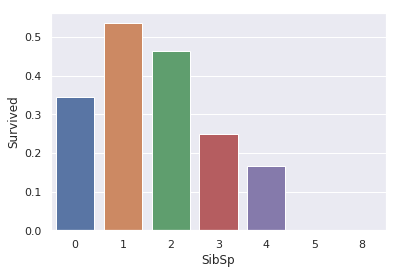

In [30]:
sns.barplot('SibSp', 'Survived', ci=None,data=train)

## Age vs Survival

## Feature Extraction

In [31]:
all_set = [train, test]
for dataset in all_set:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [33]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
for dataset in all_set:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')    
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')    
    
train[['Title', 'Survived']].groupby('Title').mean()  

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.156673
Mrs,0.792000
Other,0.347826


In [37]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in all_set:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [38]:
for dataset in all_set:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
 

In [39]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [44]:
train['Embarked'] = train.Embarked.fillna('S')

In [45]:
for dataset in all_set:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
 

In [47]:
for dataset in all_set:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.537037
1   (16.0, 32.0]  0.358916
2   (32.0, 48.0]  0.361538
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [49]:
for dataset in all_set:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [50]:
train['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [52]:
for dataset in all_set:
    dataset['Fare'] = dataset['Fare'].fillna(8.05)

In [55]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [56]:
for dataset in all_set:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


In [59]:
for dataset in all_set:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [60]:
for dataset in all_set:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [61]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [62]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [63]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


In [64]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [66]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')


80.25 percent


In [67]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

83.73


In [68]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

79.24


In [69]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

83.84


In [70]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)


87.65


In [71]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

87.65


In [72]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)


77.67


In [73]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)


79.01


In [74]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

79.8


In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)



,Model,Score
4,Decision Tree,87.65
5,Random Forest,87.65
3,KNN,83.84
1,Support Vector Machines,83.73
0,Logistic Regression,80.25
8,Stochastic Gradient Decent,79.80
2,Linear SVC,79.24
7,Perceptron,79.01
6,Naive Bayes,77.67


In [76]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

In [77]:
submission.to_csv('submission.csv', index=False)
